# Capstone Project: UK Immigration/Asylum Analysis (2001-2023)

Sprint 2

Author: Patrick Smith

Date: 19/03/2024

Contact: patrick.b.smith@gmail.com

## Forward

Introduction and figures for Britain
7.5% of people living in Britain were born abroad. (1)



|   |   |   |   |   |
|---|---|---|---|---|
| x | 1971  | 1981  | 1991  | 2001  |
| All People  | 52.6M  |  53.6M | 54.9M  |  57.1 |
| People born abroad   | 2.4M  |  2.8M | 3.2M | 4.3M  |
| % T  | 4.6%  | 5.1%  | 5.8%  | 7.6%  |




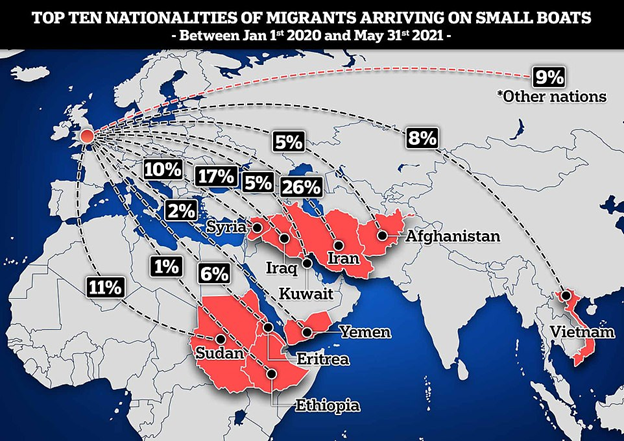


Article for Nov 2021 (2)

61% of Channel migrants come from Middle East including 26% from Iran alone

    Report by British Refugee Council outlined nationalities of Channel migrants who crossed from 2020 to 2021
    The majority of people to arrive in UK in small boats came from Middle Eastern nations such as Iran and Iraq
    The largest number came from Iran, while thousands of people came from Iraq, Syria, Kuwait and Yemen
    Around 8 per cent of arrivals from Vietnam, with 5 per cent from Afghanistan and 6 per cent from Eritrea





Source: (1): BBC, (2) DailyMail

## Table of Contents

[Inital Discovery/Problem Solving](#discovery)

[Data Manipulation](#wrangle)

[Initial Description](#Exploratory_Data_Analysis) 

[Discovery and Cleaning](#Discovery)

[Observation 1: Reviewer_Score](#Reviewer_Score)

[Observation 2: Average_Score](#Average_Score)

[Observation x: Case_Outcome](#Case_Outcome)

[Observation x: Decisions and Grants](#Decisions_Grants)

[Observation x: Return Type and Group](#Return_Type)



[EDA_Foward](#EDA_Foward)


## Description of Variables


| Column                     | Descriptor                                                                 | Datatype |
|----------------------------|----------------------------------------------------------------------------|----------|
| Year                       | Year of observation.                                                       | int32    |
| Quarter                    | Quarter of observation (Q1=1,Q2=2,Q3=3,Q4=4).                              | object   |
| Nationality                | Nationality of individual.                                                 | object   |
| Region                     | Region of observation.                                                     | object   |
| Return type group          | Type of return.                                                            | object   |
| Return type                | Specific type of return (details not initially provided, adding for consistency). | object   |
| Age                        | Age of individual, outputted in ranges (e.g., 18+).                       | object   |
| Sex                        | Gender of individual with values for male, female, and other/unknown.      | int32    |
| Return destination group   | Destination of return.                                                     | object   |
| Number of returns          | Count of returns.                                                          | float64  |
| Visa type group            | Type of visa the individual is applying to.                                | object   |
| Applicant type             | Type of applicant.                                                         | object   |
| Case outcome               | Outcome of case. This is the dependent variable. (Issued/Rejected/Withdrawal/Resettlement). | object   |
| Decisions                  | Number of decisions made.                                                  | float64  |
| Case type                  | Type of case.                                                              | object   |
| Case outcome group         | Group of case outcome.                                                     | object   |
| UASC                       | Indicates if the applicant is an Unaccompanied Asylum-Seeking Child. Added for consistency. | object   |
| Host Country               | Country of host, similar to Nationality.                                   | object   |
| Application type group     | Type of application grouped.                                               | object   |
| Application type           | Type of application.                                                       | object   |
| Grants                     | Number of grants.                                                          | float64  |
| Location of application    | Location where the application was submitted. Added for completeness.      | object   |
| Applications               | Number of applications.                                                    | float64  |
| Occupation                 | Occupation of individual.                                                  | object   |
| Industry                   | Industry of individual.                                                    | object   |
| Occ. major group           | Major group classification of the occupation. Added for completeness.      | object   |
| Occ. sub-major group       | Sub-major group classification of the occupation. Added for completeness.  | object   |
| Occ. minor group           | Minor group classification of the occupation. Added for completeness.      | object   |
| Occ. unit group            | Unit group classification of the occupation. Added for completeness.       | object   |
| Sex_Male                   | Male dummy set to 1-0.                                                     | object   |
| Sex_Female                 | Female dummy set to 1-0.                                                   | object   |
| Sex_Other                  | Other or NAs dummy set to 1-0.                                             | object   |

# Defaults 

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#get data then do .toclipboard() 
#then you can use for charts
#.plot(kind=bar", c="8eb7ff" ? you can do specific colours that you used in canva

## Initial Objective

We are going to complete the following:

1) Read the file
2) Do an initial investigation
3) Clean the data (data wrangling)
4) Do an EDA (exploratory data analysis)
5) Plots and univariate and bivariate distribution
6) Insights and conclusions to shareholders

After, we will move on to data preprocessing and modelling on the other notebook.

## Data Wrangling 

<a id = 'wrangle'><a/>

### Merging Pathway:
returns #1 -> entries #2 -> asylum #3-> grants #4 ->  
asylum_applications #5 -> applications_jobs #6  

From oldest read data to new 1-2-3-4-5-6, data is pasted on top, so it is 6-5-4-3-2-1 unfiltered.

Takes like 30 seconds - 1 minute to compute

In [ ]:
# Define the directory path
directory_path = r"C:\Users\patri\Downloads\data"

# Define the file names
returns_file_name = "returns-clean.xlsx"
entries_file_name = "entries-clean.xlsx"
asylum_file_name = "Asylum initial decisions and resettlement-clean.xlsx"
grants_file_name = "Grants of British citizenship-clean.xlsx"
asylum_applications_file_name = "asylum-applications-clean.xlsx"
grants_jobs_file_name = "grants-occupactions-visas-clean.xlsx"
application_jobs_file_name = "applications-occupactions-visas-clean.xlsx"

# Construct the full file paths
returns_file_path = os.path.join(directory_path, returns_file_name)
entries_file_path = os.path.join(directory_path, entries_file_name)
asylum_file_path = os.path.join(directory_path, asylum_file_name)
grants_file_path = os.path.join(directory_path, grants_file_name)
asylum_applications_file_path = os.path.join(directory_path, asylum_applications_file_name)
grants_jobs_file_path = os.path.join(directory_path, grants_jobs_file_name)
application_jobs_file_path = os.path.join(directory_path, application_jobs_file_name)

# Read files and set df variables per sheet
# Specifying specific columns to ensure it pulls the right columns. Without this the combination df was getting multiples of the same columns.
# Picked most columns, decided to drop the non-important ones once the data is analyzed sufficently. 
df_returns = pd.read_excel(returns_file_path, skiprows=0, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Return type group', 'Return type', 'Age', 'Sex', 'Return destination group', 'Number of returns'])
df_entries = pd.read_excel(entries_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Visa type group', 'Applicant type', 'Case outcome', 'Decisions'])
df_asylum = pd.read_excel(asylum_file_path, skiprows=0, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Case type', 'Case outcome group', 'Case outcome', 'Age', 'Sex', 'Applicant type', 'UASC', 'Host Country', 'Decisions'])
df_grants = pd.read_excel(grants_file_path, skiprows=0, usecols=['Year', 'Quarter', 'Application type group', 'Application type', 'Region', 'Nationality', 'Sex', 'Age', 'Grants'])
df_asylum_applications = pd.read_excel(asylum_applications_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Age', 'Sex', 'Applicant type', 'UASC', 'Location of application', 'Applications'])
df_grants_jobs = pd.read_excel(grants_jobs_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Occupation', 'Industry', 'Occ. major group', 'Occ. sub-major group', 'Occ. minor group', 'Occ. unit group', 'Grants'])
df_application_jobs = pd.read_excel(application_jobs_file_path, skiprows=1, usecols=['Year', 'Quarter', 'Nationality', 'Region', 'Occupation', 'Industry', 'Occ. major group', 'Occ. sub-major group', 'Occ. minor group', 'Occ. unit group', 'Applications'])

# Concatenate the dataframes along the rows axis
#Ignore_index is neccesary as the concatenation appeared to be giving different columns and rows based on combined indexes 
df_combined = pd.concat([df_returns, df_entries, df_asylum, df_grants, df_asylum_applications, df_grants_jobs, df_application_jobs], ignore_index=True)

# Sort the dataframe by 'Year' and 'Quarter'
# Almost all these values were populated in all the sheets so useful matching indicators
df_combined.sort_values(by=['Year', 'Quarter'], inplace=True)

# Display the resulting DataFrame
df_combined



In [ ]:

#df_combined.to_csv('C:\Users\patri\Downloads\clean_df.csv', index=False)

## Inital Discovery and Cleaning

Let's check how much missing values we have in the data:


In [ ]:
df_combined.info()

In [ ]:
print(f"We have {df_combined.shape[0]} rows and {df_combined.shape[1]} columns with  string, floats and integers in our clean data.")

Let's check for null or missing values. 
- Looks like Year, Quarter, Nationality, and Region are most populated and the least of our worries.
- The numerical data includes floats and integers.

Let's look at nulls. We know that there are nulls in all the columns, so we will now investigate how many nulls .

In [ ]:
# displaying sum of na per collumn
df_combined.isna().sum(axis=0)

First we can tackle quarter, nationality, and region because they have the same number of null sums, and year should be simple as well.

Let's check percentage of NA of shape of the whole df.

In [ ]:
df_combined.isna().sum()/df_combined.shape[0]*100

We can initially see that:

- The columns of 2nd priorty are: `Age`, `Sex`, and `Applicant type` because they have the lowest percentage of nulls, around 48-51%
- 3rd priority are: `Case outcome` and `Decisions`
- After we can look at the others and figure out if any could be combined or dropped
- It is likely that `Occupation`, `Industry`, and the 4 `Occ` columns could be, in some combination, combined, or dropped

First, let's check if there are any duplicates.

In [ ]:
df_combined.duplicated().sum(axis=0)

Displaying NULLS

In [ ]:
# Filter rows where 'Year' column is null or NaN
df_combined[df_combined['Year'].isnull()]

Looks like there are a lot of rows we can drop that have no data. Maybe leftovers rows from the csvs that were combined

We can delete 1384 rows because they only have NaNs and no info

In [ ]:
# Drop rows where either 'Year' or 'Quarter' column has NA
df_combined.dropna(subset=['Year', 'Quarter'], inplace=True)


In [ ]:
df_combined.shape

In [ ]:
# Optionally, save the cleaned dataframe to a new CSV
#df_combined.to_csv('df_combined_v2.csv', index=False)

Let's check if there are any duplicates.

In [ ]:
df_combined[df_combined.duplicated()]

In [ ]:
print (f"there are {df_combined.duplicated().sum()} duplicates in the dataset")

Ok we have a lot. We can drop these.

In [ ]:
df_combined = df_combined.drop_duplicates()

In [ ]:
df_combined.head()

Check if no duplicates now.

In [ ]:
df_combined[df_combined.duplicated()]

In [ ]:
df_combined.isna().sum()/df_combined.shape[0]*100

Let's look at quarter now. It's a year and a letter (Q), so let's map this into 1, 2, 3, 4

In [ ]:
df_combined['Quarter'].value_counts()

In [ ]:
# Split the 'Quarter' column into 'Year' and 'Quarter' parts
df_combined[['Year', 'Quarter']] = df_combined['Quarter'].str.split(' Q', expand=True)

# Map the 'Quarter' part to the desired values
quarter_mapping = {'1': 1, '2': 2, '3': 3, '4': 4}
#df_combined['Quarter'] = df_combined['Quarter'].map(quarter_mapping).fillna(5).astype(int)

In [ ]:
df_combined.sample(5)

In [ ]:
# Convert 'Year' and 'Quarter' to integers, handling missing values by filling with a placeholder or dropping them
df_combined['Year'] = pd.to_numeric(df_combined['Year'], errors='coerce').fillna(0).astype(int)
df_combined['Quarter'] = pd.to_numeric(df_combined['Quarter'], errors='coerce').fillna(0).astype(int)

In [ ]:
df_combined.info()

OK lets look at nationality and region now.

In [ ]:
df_combined['Nationality'].value_counts()

Checking for uniques

In [ ]:
df_combined['Nationality'].nunique()

This is fine for now. Perhaps we could combine smaller countries together or drop the smaller ones later.

In [ ]:
df_combined['Region'].value_counts()

All these have value other than 'other', which could mean anything. However, we will just leave for now and compress to more general regions, like Africa, Central & South America, Europe, Asia, Africa, Oceana, and Other

In [ ]:
# Define the mapping from specific regions to general regions
region_mapping = {
    'Africa Sub-Saharan': 'Africa',
    'America Central and South': 'America',
    'Europe Other': 'Europe',
    'Asia South': 'Asia',
    'Middle East': 'Middle East',
    'EU 14': 'Europe',
    'Asia South East': 'Asia',
    'Asia East': 'Asia',
    'Africa North': 'Africa',
    'America North': 'America',
    'Asia Central': 'Asia',
    'Oceania': 'Oceania',
    'EU 8': 'Europe',
    'Other': 'Other',
    'EU 2': 'Europe',
    'EU Other': 'Europe'
}


In [ ]:

# Apply the mapping to the 'Region' column
df_combined['General_Region'] = df_combined['Region'].map(region_mapping)

# Check the new distribution of general regions
print(df_combined['General_Region'].value_counts())


In [ ]:
# Check the new distribution of general regions
df_combined['General_Region'].value_counts()

In [ ]:
df_combined['Sex'].value_counts()

In [ ]:
# Standardize 'Sex' column to lowercase and strip whitespace
df_combined.loc[:, 'Sex'] = df_combined['Sex'].str.lower().str.strip()

# Replace variations with standard terms using loc
df_combined.loc[:, 'Sex'] = df_combined['Sex'].replace({
    'm': 'male',
    'f': 'female',
    'total (pre-2009)': 'unknown',
    'unknown sex': 'unknown',
    'u': 'unknown',
    'unknown / not given': 'unknown',
    'data unavailable in source system': 'unknown'
})



In [ ]:
# Define the mapping dictionary
sex_mapping = {
    'male': 1,
    'female': 2,
    'unknown': 3
}

# Apply the mapping
df_combined['Sex'] = df_combined['Sex'].map(sex_mapping)

# It seems you've already handled NaN values with .fillna(3), which is great
df_combined['Sex'] = df_combined['Sex'].fillna(3).astype(int)


In [ ]:
df_combined['Sex'].value_counts()

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_combined['Sex'], bins = 100 )
#plt.yscale('log')
plt.ylabel("Count", size=13)
plt.xlabel("Gender", size=13)
plt.show()

In [ ]:
df_combined['Age'].value_counts()

In [ ]:
def standardize_age(age):
    if age in ["Under 18", "17 and under"]:
        return "Under 18"
    elif age in ["18 to 29", "18-29"]:
        return "18 to 29"
    elif age in ["30 to 49", "30-49"]:
        return "30 to 49"
    elif age in ["50 to 69", "50-69"]:
        return "50 to 69"
    elif age in ["70+", "70 and over"]:
        return "70+"
    elif age in ["Unknown", "Unknown Age", "Total (pre-2009)"]:
        return "Unknown"
    else:
        return "Unknown"  # Default case if the age doesn't match any known pattern

# Apply the function to the 'Age' column
df_combined['Age'] = df_combined['Age'].apply(standardize_age)


In [ ]:
df_combined['Age'].value_counts()

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

#REF: https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas


In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_combined['Age'], bins = 100 )
#plt.yscale('log')
plt.ylabel("Count", size=13)
plt.xlabel("Gender", size=13)
plt.show()

Follows a normal distribution

In [ ]:
# Filter rows where 'Age' is 'Unknown'
age_unknown_df = df_combined[df_combined['Age'] == "Unknown"]

# Inspect the number of rows where 'Age' is 'Unknown'
print("Number of rows with 'Age' as 'Unknown':", age_unknown_df.shape[0])

# Inspect the first few rows to understand their characteristics
age_unknown_df.head()

We can further refine it later.

Now let's look at case outcome, one of our main dependent variables.

In [ ]:
df_combined['Case outcome'].value_counts()

In [ ]:
# Create a dictionary to map similar values to main categories
outcome_mapping = {
    'Refugee Permission': ['Refugee Permission', 'Temporary Refugee Permission'],
    'Issued': ['Issued', 'Humanitarian Protection'],
    'Refused': ['Refused', 'Certified Refusal', '3rd Country Refusal', 'Non-Compliance Refusal'],
    'Withdrawn': ['Withdrawn', 'Lapsed', 'Other Withdrawal', 'Non-Substantiated Withdrawal'],
    'Resettlements': [
        'Resettlement - Gateway Protection Programme',
        'Resettlement - UK Resettlement Scheme',
        'Resettlement - Vulnerable Children Resettlement Scheme',
        'Resettlement - Vulnerable Persons Resettlement Scheme',
        'Resettlement - Community Sponsorship Scheme',
        'Resettlement - Mandate Scheme',
        'Resettlement - ACRS Pathway 1 - Settled accommodation',
        'Resettlement - ACRS Pathway 2 - Settled accommodation',
        'Resettlement - ACRS Pathway 3 - Settled accommodation',
        'Relocation - ARAP - Settled accommodation',
        'Resettlement - ACRS Pathway 1 - Settled accommodation - Community Sponsorship',
        'Calais Leave',
        'Resettlement - Afghan route not recorded - Accommodation not recorded',
        'Resettlement - ACRS Pathway 3 - Interim accommodation',
        'Resettlement - ACRS Pathway 2 - Settled accommodation - Community Sponsorship',
        'Resettlement - Afghan route not recorded - Settled accommodation'
    ]
}


In [ ]:
# Reverse the mapping for easier application
reverse_mapping = {}
for category, values in outcome_mapping.items():
    for value in values:
        reverse_mapping[value] = category

# Apply reverse mapping
df_combined['Case outcome'] = df_combined['Case outcome'].map(reverse_mapping)

# Assign 'Other' to any case outcome not covered by the categories
df_combined.loc[~df_combined['Case outcome'].isin(outcome_mapping.keys()), 'Case outcome'] = 'Unknown'


Leaving it set to Other.NA for now, but I'm considering changing it to something more sophisicated later.

In [ ]:
df_combined['Case outcome'].value_counts()

In [ ]:
df_combined.info()

<div id='Case_Outcome'></div>

### Notable Observation: Case Outcome

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named df_combined

# Filter the dataframe to exclude 'Other.NA' from 'Case outcome'
filtered_df = df_combined[df_combined['Case outcome'] != 'Unknown']

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
outcome_counts = filtered_df.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
outcome_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Case Outcome Over Year (Excluding Other.NA)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.show()

#normalize it / percentages / ratios

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named df_combined

# Filter the dataframe to exclude 'Other.NA' from 'Case outcome'
filtered_df = df_combined[df_combined['Case outcome'] != 'Unknown']

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
outcome_counts = filtered_df.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Normalize by row (percentage of each year's total)
outcome_counts_norm_row = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Normalize by column (percentage of each case outcome's total)
outcome_counts_norm_col = outcome_counts.div(outcome_counts.sum(axis=0), axis=1) * 100

# Plot the normalized data
outcome_counts_norm_row.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Case Outcome Over Year (Excluding Other.NA) - By Row')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.show()

There was a general election in 2005 where immigration was one of the main political discussions.

The tough stuff worked, in the sense that fewer people applied for asylum in 2004 than in any year since 1998 (whether the system had got any better at sifting genuine claims from false ones is less certain). Reduced numbers, in turn, meant a calmer electorate. Polls by MORI, a pollster, show that the proportion of Britons citing immigration and race as one of the two most important issues facing the nation declined gradually from a pre-campaign peak of 39% in May 2002 to 26% in January 2005. It then shot up again when Labour and the Tories unveiled their policies.


REF: https://www.encyclopedia.com/humanities/applied-and-social-sciences-magazines/uk-immigration-and-2005-general-election

In [ ]:
df_combined['Case outcome group'].value_counts()

In [ ]:
# Define the list of known groups
known_groups = ['Refused', 'Grant of Protection', 'Withdrawn', 'Grant of Other Leave']

# Use `.where()` to keep the value if it's in known_groups, else replace with 'Unknown'
df_combined['Case outcome group'] = df_combined['Case outcome group'].where(df_combined['Case outcome group'].isin(known_groups), other='Unknown')


In [ ]:
df_combined.isna().sum()/df_combined.shape[0]*100

In [ ]:
df_combined.info()

In [ ]:

# Filter the dataframe to exclude rows where 'Case outcome' is 'NA'
filtered_df = df_combined[df_combined['Case outcome'] != 'Other.NA']

# Group filtered data by 'Nationality' and 'Case outcome' and count occurrences
grouped_counts = filtered_df.groupby(['Nationality', 'Case outcome']).size().unstack(fill_value=0)

# Get the top 50 nationalities by total count across all case outcomes
top_50_nationalities = grouped_counts.sum(axis=1).nlargest(50).index

# Filter the grouped counts dataframe to include only the top 50 nationalities
grouped_counts_top_50 = grouped_counts.loc[top_50_nationalities]

# Sort the data by the "Issued" count in descending order
grouped_counts_top_50_sorted = grouped_counts_top_50.sort_values(by='Issued', ascending=False)

# Plot the sorted data
grouped_counts_top_50_sorted.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Top 50 Nationalities by Case Outcome (Excluding NA) - Sorted by Issued Count')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# Filter the dataframe to include only rows where 'Nationality' is 'Iraq' and 'Case outcome' is not 'Other.NA'
filtered_df_iraq = df_combined[(df_combined['Nationality'] == 'Iraq') & (df_combined['Case outcome'] != 'Other.NA')]

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
grouped_counts_iraq = filtered_df_iraq.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
grouped_counts_iraq.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Case Outcome for Nationality "Iraq" Over Time (Excluding NA)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


The Iraq War (Arabic: حرب العراق, romanized: ḥarb ālʿirāq) was a protracted armed conflict in Iraq from 2003 to 2011. It began with the invasion of Iraq by the United States-led coalition that overthrew the Ba'athist government of Saddam Hussein. The conflict continued for much of the next decade as an insurgency emerged to oppose the coalition forces and the post-invasion Iraqi government. US troops were officially withdrawn in 2011. 

REF: https://en.wikipedia.org/wiki/Iraq_War

In [ ]:
# Filter the dataframe to include only rows where 'Nationality' is 'Syria' and 'Case outcome' is not 'Other.NA'
filtered_df_syria = df_combined[(df_combined['Nationality'] == 'Syria') & (df_combined['Case outcome'] != 'Other.NA')]

# Group filtered data by 'Year' and 'Case outcome' and count occurrences
grouped_counts_syria = filtered_df_syria.groupby(['Year', 'Case outcome']).size().unstack(fill_value=0)

# Plot the data
grouped_counts_syria.plot(kind='bar', stacked=False, figsize=(16, 8))
plt.title('Case Outcome for Nationality "Syria" Over Time (Excluding NA)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Case Outcome', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The Syrian civil war (Arabic: ٱلْحَرْبُ ٱلْأَهْلِيَّةُ ٱلسُّورِيَّةُ, romanized: al-ḥarb al-ʾahlīyah al-sūrīyah) is an ongoing multi-sided conflict in Syria involving various state-sponsored and non-state actors. In March 2011, popular discontent with the rule of Bashar al-Assad triggered large-scale protests and pro-democracy rallies across Syria, as part of the wider Arab Spring protests in the region. After months of crackdown by governments security apparatus, various armed rebel groups such as the Free Syrian Army began forming across the country, marking the beginning of the Syrian insurgency. By mid-2012, the crisis had escalated into a full-blown civil war.

Receiving arms from NATO and GCC states, rebel forces initially made significant advances against the government forces, who were receiving arms from Iran and Russia. Rebels captured the regional capitals of Raqqa in 2013 and Idlib in 2015. Consequently, in September 2015, Russia launched a military intervention in support of the government, shifting the balance of the conflict. By late 2018, all rebel strongholds, except parts of Idlib region, had fallen to the government forces. 

REF: https://en.wikipedia.org/wiki/Syrian_civil_war

In [ ]:
# Step 1: Filter the dataframe to include only the top 50 nationalities
top_50_nationalities = df_combined['Nationality'].value_counts().head(50).index

# Step 2: Iterates for top 50. Calculates counts for refused, withdrawn, issued, and refugee permission cases for each nationality
rejection_data = []
for nationality in top_50_nationalities:
    nationality_data = df_combined[df_combined['Nationality'] == nationality]
    refused_count = nationality_data[nationality_data['Case outcome'] == 'Refused'].shape[0]
    withdrawn_count = nationality_data[nationality_data['Case outcome'] == 'Withdrawn'].shape[0]
    issued_count = nationality_data[nationality_data['Case outcome'] == 'Issued'].shape[0]
    refugee_permission_count = nationality_data[nationality_data['Case outcome'] == 'Refugee Permission'].shape[0]
    
    # Step 3: Calculates total - issued + refugee permission 
    total_issued_refugee_permission = issued_count + refugee_permission_count

    # Step 4: Calculates total - total refused + withdrawn
    total_refused_withdrawn = refused_count + withdrawn_count
    
    # Step 5: Calculate the rejection ratio
    rejection_ratio = round((refused_count / total_issued_refugee_permission), 2)

    # Step 6: Calculate the total rejection ratio (including withdrawals)
    total_rejection_ratio = round((total_refused_withdrawn / total_issued_refugee_permission), 2)
    
    # Step 7: Append the data to the list
    rejection_data.append((nationality, refused_count, withdrawn_count, issued_count, refugee_permission_count, total_issued_refugee_permission, rejection_ratio, total_rejection_ratio))

# Display the results in a DataFrame
rejection_df = pd.DataFrame(rejection_data, columns=['Nationality', 'Refused', 'Withdrawn', 'Issued', 'Refugee Permission', 'Total Issued + Refugee Permission', 'Rejection Ratio', 'Total Rejection Ratio'])
print(rejection_df)


In [ ]:
import matplotlib.pyplot as plt

# Sort the rejection data by rejection ratio in descending order
rejection_df_sorted = rejection_df.sort_values(by='Rejection Ratio', ascending=False)

# Select the top 50 countries
top_50_rejection = rejection_df_sorted.head(50)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_50_rejection['Nationality'], top_50_rejection['Rejection Ratio'], color='skyblue')
plt.xlabel('Rejection Ratio')
plt.ylabel('Nationality')
plt.title('Top 50 Countries by Rejection Ratio')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rejection ratio at the top
plt.tight_layout()
plt.show()


In [ ]:
# Sort the rejection data by total rejection ratio in descending order
rejection_df_sorted = rejection_df.sort_values(by='Total Rejection Ratio', ascending=False)

# Select the top 50 countries
top_50_rejection = rejection_df_sorted.head(50)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_50_rejection['Nationality'], top_50_rejection['Total Rejection Ratio'], color='skyblue')
plt.xlabel('Total Rejection Ratio')
plt.ylabel('Nationality')
plt.title('Top 50 Countries by Total Rejection Ratio')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest total rejection ratio at the top
plt.tight_layout()
plt.show()


In [ ]:
df_combined.info()

<div id='Decisions_Grants'></div>

### Notable Observation x: Decisions and Grants

In [ ]:
df_combined['Decisions'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_combined['Decisions'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Decisions')
plt.ylabel('Frequency')
plt.title('Distribution of Decision Counts')
plt.yscale('log')  # Optional: Use logarithmic scale for the y-axis to better visualize wide-ranging frequencies
plt.show()


In [ ]:
df_combined['Decisions'] = pd.to_numeric(df_combined['Decisions'], errors='coerce').fillna(0)

In [ ]:
df_combined['Decisions'].value_counts()

In [ ]:
df_combined['Grants'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_combined['Grants'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Grants')
plt.ylabel('Frequency')
plt.title('Distribution of Grants Counts')
plt.yscale('log')  # Optional: Use logarithmic scale for the y-axis to better visualize wide-ranging frequencies
plt.show()


In [ ]:
df_combined['Grants'] = pd.to_numeric(df_combined['Grants'], errors='coerce').fillna(0)

# Optionally, convert the column to int if you know there are no decimal values and you want integer values
#df_combined['Grants'] = df_combined['Grants'].astype(int)

#Ask if this matters

Ok 'Grants' is fairly small in comparison to decisions. Let's graph both together to confirm:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plotting both distributions on the same histogram for comparison
plt.hist(df_combined['Grants'], bins=50, color='skyblue', edgecolor='black', alpha=0.5, label='Grants')
plt.hist(df_combined['Decisions'], bins=50, color='red', edgecolor='black', alpha=0.5, label='Decisions')

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Decision and Grant Counts')
plt.yscale('log')  # Optional: Use logarithmic scale for the y-axis to better visualize wide-ranging frequencies
plt.legend()
plt.show()


OK it is very small. 

Let's investigate if both values are 0 and what the documents look like. Maybe we can clean some more useless rows.

In [ ]:
# Filter the DataFrame
rows_with_zero_grants_and_decisions = df_combined[(df_combined['Grants'] == 0) & (df_combined['Decisions'] == 0)]


In [ ]:
rows_with_zero_grants_and_decisions

OK We have to look at 'Applications', we forgot about that. This is probably another useful int column.

In [ ]:
df_combined['Applications'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_combined['Applications'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Applications')
plt.ylabel('Frequency')
plt.title('Distribution of Applications Counts')
plt.yscale('log')  # Optional: Use logarithmic scale for the y-axis to better visualize wide-ranging frequencies
plt.show()


In [ ]:
df_combined['Applications'] = pd.to_numeric(df_combined['Applications'], errors='coerce').fillna(0)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting both distributions on the same histogram for comparison
plt.hist(df_combined['Grants'], bins=50, color='skyblue', edgecolor='black', alpha=0.5, label='Grants')
plt.hist(df_combined['Decisions'], bins=50, color='red', edgecolor='black', alpha=0.5, label='Decisions')
plt.hist(df_combined['Applications'], bins=50, color='red', edgecolor='black', alpha=0.5, label='Applications')

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Decision, Grant, and Application Counts')
plt.yscale('log')  # Optional: Use logarithmic scale for the y-axis to better visualize wide-ranging frequencies
plt.legend()
plt.show()

In [ ]:
# Filter the DataFrame
rows_with_zero_grants_and_decisions = df_combined[(df_combined['Grants'] == 0) & (df_combined['Decisions'] == 0) & (df_combined['Applications'] == 0)]


In [ ]:
rows_with_zero_grants_and_decisions.sample(10)

In [ ]:
df_combined['Total_Grants_Decisions_Applications'] = df_combined['Grants'] + df_combined['Decisions'] + df_combined['Applications']


In [ ]:
df_combined['Location of application'].value_counts()

This is not neccesary for anything. Drop.

In [ ]:
df_combined.drop(columns=['Location of application'], inplace=True)

In [ ]:
df_combined['Application type group'].value_counts()

In [ ]:
df_combined['Application type group'].value_counts()

Naturalisation doesn't add up. So let's keep them the way they are and anyalze later. Set others to unknown.

In [ ]:
df_combined['Application type'].value_counts()

<div id='Return_Type'></div>

### Notable Observation x: Return Type

In [ ]:
df_combined['Return type'].value_counts()
#acceptance / refusals - positive vs. negative wnv
#hypothesis testing top 50 

Some of these might be useful later. Let's map together some that are similar, as well as the unknowns, and set the rest to 0.

turning into strings. was getting a float object strip error. must of been some numbers

In [ ]:
df_combined['Return type'] = df_combined['Return type'].astype(str)

In [ ]:
# Convert 'Return type' to string to ensure string methods can be applied
df_combined['Return type'] = df_combined['Return type'].astype(str)

# Standardize 'Return type' column to lowercase and strip whitespace
df_combined.loc[:, 'Return type'] = df_combined['Return type'].str.lower().str.strip()

# Replace variations with standard terms using loc
df_combined.loc[:, 'Return type'] = df_combined['Return type'].replace({
    'non-detained enforced removals': 'non-detained enforced removals',
    'non-detained enforced removals': 'non-detained enforced removals',
    'n/a - pre-2007': 'Unknown',
    'not available': 'Unknown'
})

# Note: Further mapping to consolidate into broader categories or set others to '0' can follow a similar approach.
# Assuming 'outcome_mapping' contains broader categories for 'Return type' or another relevant mapping
# You would first prepare a reversed mapping dictionary from 'outcome_mapping' to facilitate this step.

#REF: https://stackoverflow.com/questions/43332057/strip-whitespace-from-strings-in-a-column


In [ ]:
df_combined['Return type'].value_counts()

In [ ]:
df_combined.loc[:, 'Return type'] = df_combined['Return type'].replace({'nan': 'Unknown'})

#remove later

In [ ]:
df_combined['Return type'].value_counts()

In [ ]:
df_combined['Return type group'].value_counts()

In [ ]:
df_combined['Return type group'] = pd.to_numeric(df_combined['Return type group'], errors='coerce').fillna(0)

In [ ]:
df_combined.isna().sum()/df_combined.shape[0]*100

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_combined['Return type group'], bins = 100 )
#plt.yscale('log')
plt.ylabel("Count", size=13)
plt.xlabel("Return Type", size=13)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting both distributions on the same histogram for comparison
plt.hist(df_combined['Return type'], bins=50, color='skyblue', edgecolor='black', alpha=0.5, label='Return type')
plt.hist(df_combined['Return type group'], bins=50, color='red', edgecolor='black', alpha=0.5, label='Return type group')

plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Distribution of Return type and Return type group Counts')
plt.yscale('log')  # Optional: Use logarithmic scale for the y-axis to better visualize wide-ranging frequencies
plt.legend()
plt.show()

In [ ]:
df_combined['Host Country'].value_counts()

This might be helpful for 'Asylum case' - to compare with 'Nationality'

In [ ]:
# Update values in the 'Host Country' column based on new categories
df_combined['Host Country'] = df_combined['Host Country'].replace({
    'Resettlement (Pre-2021 Q1) - N/A': 'Resettlement',
    'Afghan resettlement case - N/A': 'Resettlement',
    'Asylum case - N/A': 'Asylum case - N/A'
})


In [ ]:
df_combined['Host Country'].value_counts()

In [ ]:
df_combined.info()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only the top 50 nationalities
top_50_nationalities = df_combined['Nationality'].value_counts().head(50).index
filtered_df = df_combined[df_combined['Nationality'].isin(top_50_nationalities)]

# Filter the filtered DataFrame to exclude rows where 'Host Country' is 'Resettlement'
filtered_df = filtered_df[filtered_df['Host Country'] != 'Resettlement']

# Sort the filtered DataFrame by the count of 'Asylum case - N/A' from highest to lowest
filtered_df = filtered_df.sort_values(by=filtered_df.columns[0], ascending=False)

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot
sns.countplot(y='Host Country', hue='Nationality', data=filtered_df, order=filtered_df['Host Country'].value_counts().index)

# Set the title and labels
plt.title('Top 50 Nationalities vs Host Country (excluding Resettlement)')
plt.xlabel('Count')
plt.ylabel('Host Country')

# Rotate the y-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Nationality', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
df_combined['Host Country'].value_counts()

In [ ]:
df_combined['Industry'].value_counts()

In [ ]:
df_combined['Occupation'].value_counts()

Industry has better info than this. We can remove Occ. major group

In [ ]:
# Drop the 'Occ. major group' column from df_combined
df_combined.drop(columns=['Occ. major group'], inplace=True)

In [ ]:
df_combined.info()

In [ ]:
df_combined['Occ. sub-major group'].value_counts()

Industry is better. Remove this.

In [ ]:
# Drop the 'Occ. sub-major group' column from df_combined
df_combined.drop(columns=['Occ. sub-major group'], inplace=True)

In [ ]:
df_combined['Occ. minor group'].value_counts()

'Occupaction' looks better. This appears redundant. Drop

In [ ]:
# Drop the 'Occ. minor group' column from df_combined
df_combined.drop(columns=['Occ. minor group'], inplace=True)

In [ ]:
df_combined['Occ. unit group'].value_counts()

In [ ]:
# Again, same as occupaction. Can drop.
# Drop the 'Occ. unit group' column from df_combined
df_combined.drop(columns=['Occ. unit group'], inplace=True)

In [ ]:
df_combined.info()

In [ ]:
df_combined['Case outcome'].value_counts()

In [ ]:
nationality_counts_alphabetical = df_combined['Nationality'].value_counts().sort_index()

nationality_counts_alphabetical

# Save the nationality counts to a CSV file
nationality_counts_alphabetical.to_csv('nationality_counts.csv')

In [ ]:
# Convert the Series to a DataFrame
nationality_counts_df = nationality_counts_alphabetical.reset_index()

# Rename the columns
nationality_counts_df.columns = ['Nationality', 'Count']

# Save the DataFrame to a CSV file
nationality_counts_df.to_csv('nationality_counts.csv', index=False)


In [ ]:
nationality_counts_df

In [ ]:
df_combined.sample(30)

#evident that grants and applications are the same and should be combined
#age ranges
#location of application - can number or remove



In [ ]:
# Assuming df_combined is your DataFrame containing the columns 'Grants' and 'Applications'

# Fill NaN values with 0 in both 'Grants' and 'Applications' columns
df_combined['Grants'].fillna(0, inplace=True)
df_combined['Applications'].fillna(0, inplace=True)
df_combined['Decisions'].fillna(0, inplace=True)

# Concatenate the two numerical columns into a new column named 'Total'
df_combined['Total Grants & Applications & Decisions'] = df_combined['Grants'] + df_combined['Applications'] + df_combined['Decisions']



In [ ]:
df_combined['Total Grants & Applications & Decisions'].value_counts()

In [ ]:
df_combined.drop(columns=['Decisions'], inplace=True)

In [ ]:
df_combined.sample(30)

In [ ]:
df_combined.info()

In [ ]:
df_combined['Decisions'].value_counts()

In [ ]:
df_combined['Grants'].value_counts()

In [ ]:
df_combined['Applications'].value_counts()

In [ ]:
#sanity check
df_combined['Total Grants & Applications & Decisions'].value_counts()

## 